In [1]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torch.utils.data import DataLoader
from torchvision import datasets, transforms
import matplotlib.pyplot as plt

torch.manual_seed(0)
device = torch.device("cuda")
batch_size=64

d:\Study\Projects\llm\venv\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


## LOADING MNIST DATA

In [2]:
# Download and preprocess the MNIST dataset
transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.5,), (0.5,))])
train_dataset = datasets.MNIST(root='./data', train=True, transform=transform, download=True)
train_loader = DataLoader(dataset=train_dataset, batch_size=batch_size, shuffle=True)
test_dataset = datasets.MNIST(root='./data', train=False, transform=transform, download=True)
test_loader = DataLoader(dataset=test_dataset, batch_size=batch_size, shuffle=False)

In [3]:
all_labels = []
train_features, train_labels = next(iter(train_loader))
all_labels.extend(train_labels.tolist())
unique_labels = set(all_labels)
print("All labels:", unique_labels)

All labels: {0, 1, 2, 3, 4, 5, 6, 7, 8, 9}


Feature batch shape: torch.Size([64, 1, 28, 28])
Labels batch shape: torch.Size([64])


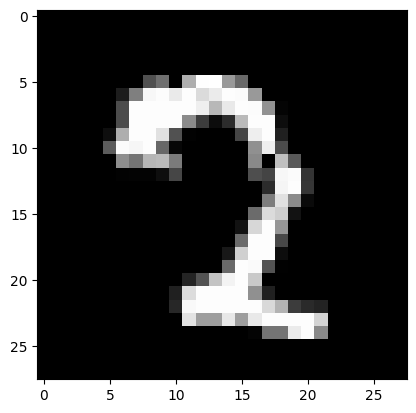

Label: 2


In [4]:
# Display image and label.
train_features, train_labels = next(iter(train_loader))
print(f"Feature batch shape: {train_features.size()}")
print(f"Labels batch shape: {train_labels.size()}")
img = train_features[0].squeeze()
label = train_labels[0]
plt.imshow(img, cmap="gray")
plt.show()
print(f"Label: {label}")

## Model Architecture 

In [5]:
pip install opencv-python

# Generative Adversarial Network

In [6]:
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5,), (0.5,))  # Normalize to [-1, 1] range
])

trainset = datasets.MNIST('data', download=True, train=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=64, shuffle=True)


In [7]:
for ste, (x,y) in enumerate(trainloader):
    print(x.shape)
    print(y.shape)
    break

torch.Size([64, 1, 28, 28])
torch.Size([64])


In [8]:
class Generator(nn.Module):
    def __init__(self, latent_size=100):
        super().__init__()
        self.model = nn.Sequential(
            nn.Linear(latent_size, 128),
            nn.LeakyReLU(),
            nn.Linear(128, 256),
            nn.LeakyReLU(),
            nn.Linear(256, 784),  # Output layer for 28x28 images
            nn.Tanh()  # Ensure values are in [-1, 1] range
        )

    def forward(self, z):
        return self.model(z)

class Discriminator(nn.Module):
    def __init__(self):
        super().__init__()
        self.model = nn.Sequential(
            nn.Linear(784, 256),
            nn.LeakyReLU(),
            nn.Linear(256, 128),
            nn.LeakyReLU(),
            nn.Linear(128, 1),
            nn.Sigmoid()  # Output probability of real vs. fake
        )

    def forward(self, x):
        return self.model(x.view(x.size(0), -1)) 


In [9]:
generator = Generator()
discriminator = Discriminator()

optimizer_G = optim.Adam(generator.parameters(), lr=0.0002)
optimizer_D = optim.Adam(discriminator.parameters(), lr=0.0002)


In [10]:
epochs = 200
for epoch in range(epochs):
    for i, (real_images, _) in enumerate(trainloader):
        # Train Discriminator
        optimizer_D.zero_grad()
        criterion = nn.BCELoss()
        real_labels = torch.ones(real_images.size(0), 1)
        real_output = discriminator(real_images)
        real_loss = criterion(real_output, real_labels)
        # Fake images
        noise = torch.randn(real_images.size(0), 100)
        fake_images = generator(noise)
        fake_labels = torch.zeros(real_images.size(0), 1)
        fake_output = discriminator(fake_images.detach())
        fake_loss = criterion(fake_output, fake_labels)


        d_loss = real_loss + fake_loss
        d_loss.backward()
        optimizer_D.step()

        # Train Generator
        optimizer_G.zero_grad()

        # Generator wants discriminator to classify fake images as real
        gen_labels = torch.ones(real_images.size(0), 1)
        gen_output = discriminator(fake_images)
        g_loss = criterion(gen_output, gen_labels)

        g_loss.backward()
        optimizer_G.step()

    # Print progress
    print(f"Epoch [{epoch+1}/{epochs}], Step [{i+1}/{len(trainloader)}], d_loss: {d_loss.item():.4f}, g_loss: {g_loss.item():.4f}")


Epoch [1/200], Step [938/938], d_loss: 0.4450, g_loss: 2.0021
Epoch [2/200], Step [938/938], d_loss: 0.5217, g_loss: 2.8368
Epoch [3/200], Step [938/938], d_loss: 1.1606, g_loss: 1.5506
Epoch [4/200], Step [938/938], d_loss: 0.6716, g_loss: 2.0567
Epoch [5/200], Step [938/938], d_loss: 1.1041, g_loss: 2.2551
Epoch [6/200], Step [938/938], d_loss: 0.6608, g_loss: 2.8947
Epoch [7/200], Step [938/938], d_loss: 0.7343, g_loss: 2.3696
Epoch [8/200], Step [938/938], d_loss: 0.4250, g_loss: 3.4305
Epoch [9/200], Step [938/938], d_loss: 0.3819, g_loss: 2.9235
Epoch [10/200], Step [938/938], d_loss: 0.5899, g_loss: 2.2639
Epoch [11/200], Step [938/938], d_loss: 0.8921, g_loss: 2.0353
Epoch [12/200], Step [938/938], d_loss: 0.3239, g_loss: 4.3254
Epoch [13/200], Step [938/938], d_loss: 0.7544, g_loss: 3.6699
Epoch [14/200], Step [938/938], d_loss: 0.6215, g_loss: 3.4215
Epoch [15/200], Step [938/938], d_loss: 0.6854, g_loss: 2.9996
Epoch [16/200], Step [938/938], d_loss: 0.7460, g_loss: 2.0518
E

In [12]:
torch.save({"generator": generator, "discriminator": discriminator}, "gan_model.pt")

In [16]:
print(generator)

Generator(
  (model): Sequential(
    (0): Linear(in_features=100, out_features=128, bias=True)
    (1): LeakyReLU(negative_slope=0.01)
    (2): Linear(in_features=128, out_features=256, bias=True)
    (3): LeakyReLU(negative_slope=0.01)
    (4): Linear(in_features=256, out_features=784, bias=True)
    (5): Tanh()
  )
)


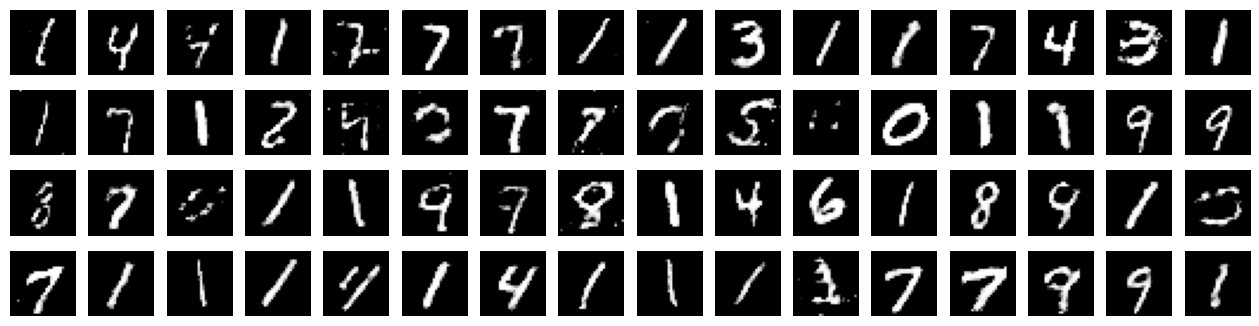

In [26]:
# Assuming a latent space of 100 and desired batch size of 64
noise = torch.randn(64, 100)
generated_images = generator(noise)
# For MNIST-like images (28x28 grayscale)
images = generated_images.view(64, 28, 28).clamp(0, 1)  # Reshape and clamp values
import matplotlib.pyplot as plt

fig, axs = plt.subplots(4, 16, figsize=(16, 4))  # Adjust grid size as needed
for i, ax in enumerate(axs.flat):
    ax.imshow(images[i].detach().numpy(), cmap='gray')
    ax.axis('off')
plt.show()
